**Introduction**

In [2]:
# import libraries
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from glob import glob


Found 1 images


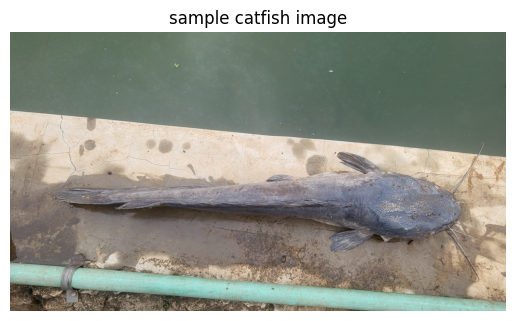

In [9]:
# import our images data
img_paths = glob("/home/ktwoo/Documents/wecan-farm/juasamaki/data/catfish/cf-wcf01.jpg")
print(f"Found {len(img_paths)} images")

# read one image using OpenCV
img = cv2.imread(img_paths[0])

# convert the RGB for matplotlib
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img_rgb)
plt.title("sample catfish image")
plt.axis("off")
plt.show()


In [10]:
# inspect image properties to understand the Height, width
# the number of color channels
# pixel intensity range from 0 - 255

print("shape (H, W ,C):", img.shape)
print("Data type:", img.dtype)
print("Pixel range:", img.min(), "_", img.max())


shape (H, W ,C): (2252, 4000, 3)
Data type: uint8
Pixel range: 0 _ 255


#### Basic preprocessing: resizing and normalization

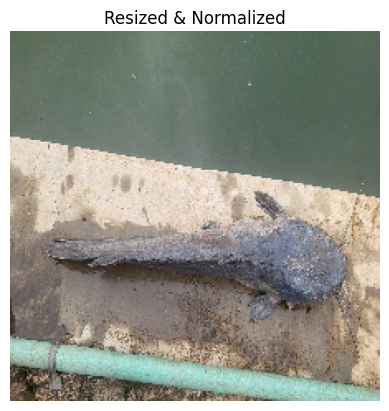

In [11]:
# resize to a standard for CNNs
resized = cv2.resize(img_rgb, (224, 224))

#normalized pixel values (0-1)
normalized = resized / 255.0

plt.imshow(normalized)
plt.title("Resized & Normalized")
plt.axis("off")
plt.show()



#### Convert to grayscale & view edges

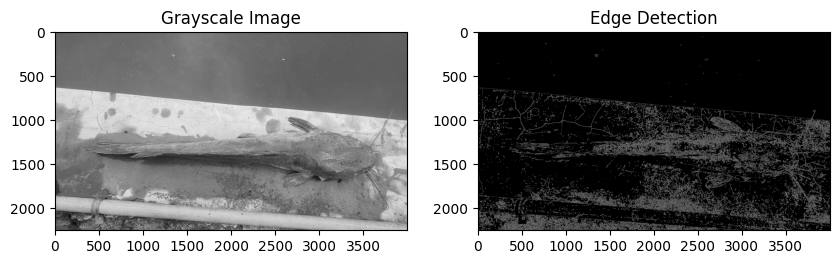

In [12]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Detect edges
edges = cv2.Canny(gray, threshold1=80, threshold2=200)

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.imshow(gray, cmap="gray")
plt.title("Grayscale Image")

plt.subplot(1,2,2)
plt.imshow(edges, cmap="gray")
plt.title("Edge Detection")
plt.show()


#### HSV Tuner

In [1]:
import cv2
import numpy as np

def nothing(x): pass

# Load your catfish image
img = cv2.imread("/home/ktwoo/Documents/wecan-farm/juasamaki/img/ct-sample.png")
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

cv2.namedWindow("HSV Tuner")

# Create trackbars for Hue, Saturation, and Value range
cv2.createTrackbar("LH", "HSV Tuner", 0, 179, nothing)
cv2.createTrackbar("LS", "HSV Tuner", 0, 255, nothing)
cv2.createTrackbar("LV", "HSV Tuner", 0, 255, nothing)
cv2.createTrackbar("UH", "HSV Tuner", 179, 179, nothing)
cv2.createTrackbar("US", "HSV Tuner", 255, 255, nothing)
cv2.createTrackbar("UV", "HSV Tuner", 255, 255, nothing)

while True:
    lh = cv2.getTrackbarPos("LH", "HSV Tuner")
    ls = cv2.getTrackbarPos("LS", "HSV Tuner")
    lv = cv2.getTrackbarPos("LV", "HSV Tuner")
    uh = cv2.getTrackbarPos("UH", "HSV Tuner")
    us = cv2.getTrackbarPos("US", "HSV Tuner")
    uv = cv2.getTrackbarPos("UV", "HSV Tuner")

    lower = np.array([lh, ls, lv])
    upper = np.array([uh, us, uv])

    mask = cv2.inRange(hsv, lower, upper)
    result = cv2.bitwise_and(img, img, mask=mask)

    cv2.imshow("Mask", mask)
    cv2.imshow("Result", result)

    key = cv2.waitKey(1) & 0xFF
    if key == 27:  # ESC key to exit
        break

cv2.destroyAllWindows()


Only C and default locale supported with the posix collation implementation
Only C and default locale supported with the posix collation implementation
Case insensitive sorting unsupported in the posix collation implementation
Numeric mode unsupported in the posix collation implementation
Only C and default locale supported with the posix collation implementation
Only C and default locale supported with the posix collation implementation
Case insensitive sorting unsupported in the posix collation implementation
Numeric mode unsupported in the posix collation implementation


KeyboardInterrupt: 

##### Inspect What OpenCV “Sees”

In [22]:
import cv2
import numpy as np

img = cv2.imread("/home/ktwoo/Documents/wecan-farm/juasamaki/img/ct-sample.png")

if img is None:
    raise ValueError("Image not found — check your path!")

# Convert to HSV
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

cv2.imshow("Original", img)
cv2.imshow("HSV", hsv)
cv2.waitKey(0)
cv2.destroyAllWindows()


KeyboardInterrupt: 

#### Preview measuring fish contour (prototype)

In [1]:
# Load image
img = cv2.imread("/home/ktwoo/Documents/wecan-farm/juasamaki/img/cf-wcf01.jpg")
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# 1️⃣ Define color range for fish (bluish/gray)
# Tune these numbers depending on your image tone
lower_fish = np.array([100, 0, 0])    # lower hue, low saturation, low brightness
upper_fish = np.array([179, 255, 255]) # upper hue, high saturation, high brightness

# 2️⃣ Create mask: keep pixels within color range
mask = cv2.inRange(hsv, lower_fish, upper_fish)

# 3️⃣ Remove noise and fill gaps
kernel = np.ones((7, 7), np.uint8)
mask_clean = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel, iterations=3)
mask_clean = cv2.morphologyEx(mask_clean, cv2.MORPH_OPEN, kernel, iterations=2)

# 4️⃣ Find contours from the mask
contours, _ = cv2.findContours(mask_clean, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# 5️⃣ Filter and pick the largest contour
fish_contour = max(contours, key=cv2.contourArea) if contours else None

# 6️⃣ Draw contour and bounding box
result = img_rgb.copy()
if fish_contour is not None:
    cv2.drawContours(result, [fish_contour], -1, (255, 0, 0), 3)
    x, y, w, h = cv2.boundingRect(fish_contour)
    cv2.rectangle(result, (x, y), (x + w, y + h), (0, 255, 0), 3)
    print(f"Detected fish: width={w}px, height={h}px, area={cv2.contourArea(fish_contour):.0f}")
else:
    print("No fish detected!")

plt.figure(figsize=(10,6))
plt.imshow(result)
plt.title("Fish Contour and Bounding Box via HSV Color Segmentation")
plt.axis("off")
plt.show()


NameError: name 'cv2' is not defined